In [8]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [4]:
df = load_diabetes(as_frame=True).frame

In [5]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [7]:
X = df.drop(["target"],axis=1)
y = df["target"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)  

In [32]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=7, min_samples_leaf=20)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=20)

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_train = model.predict(X_train)
y_pred_test= model.predict(X_test)

print("MSE train: ", mean_squared_error(y_train, y_pred_train))
print("MSE test: ", mean_squared_error(y_test, y_pred_test))

print("r^2 train: ", r2_score(y_train, y_pred_train))
print("r^2 test: ", r2_score(y_test, y_pred_test))

MSE train:  2575.6857735365043
MSE test:  3952.232461261976
r^2 train:  0.5718571156697081
r^2 test:  0.31328340842141444


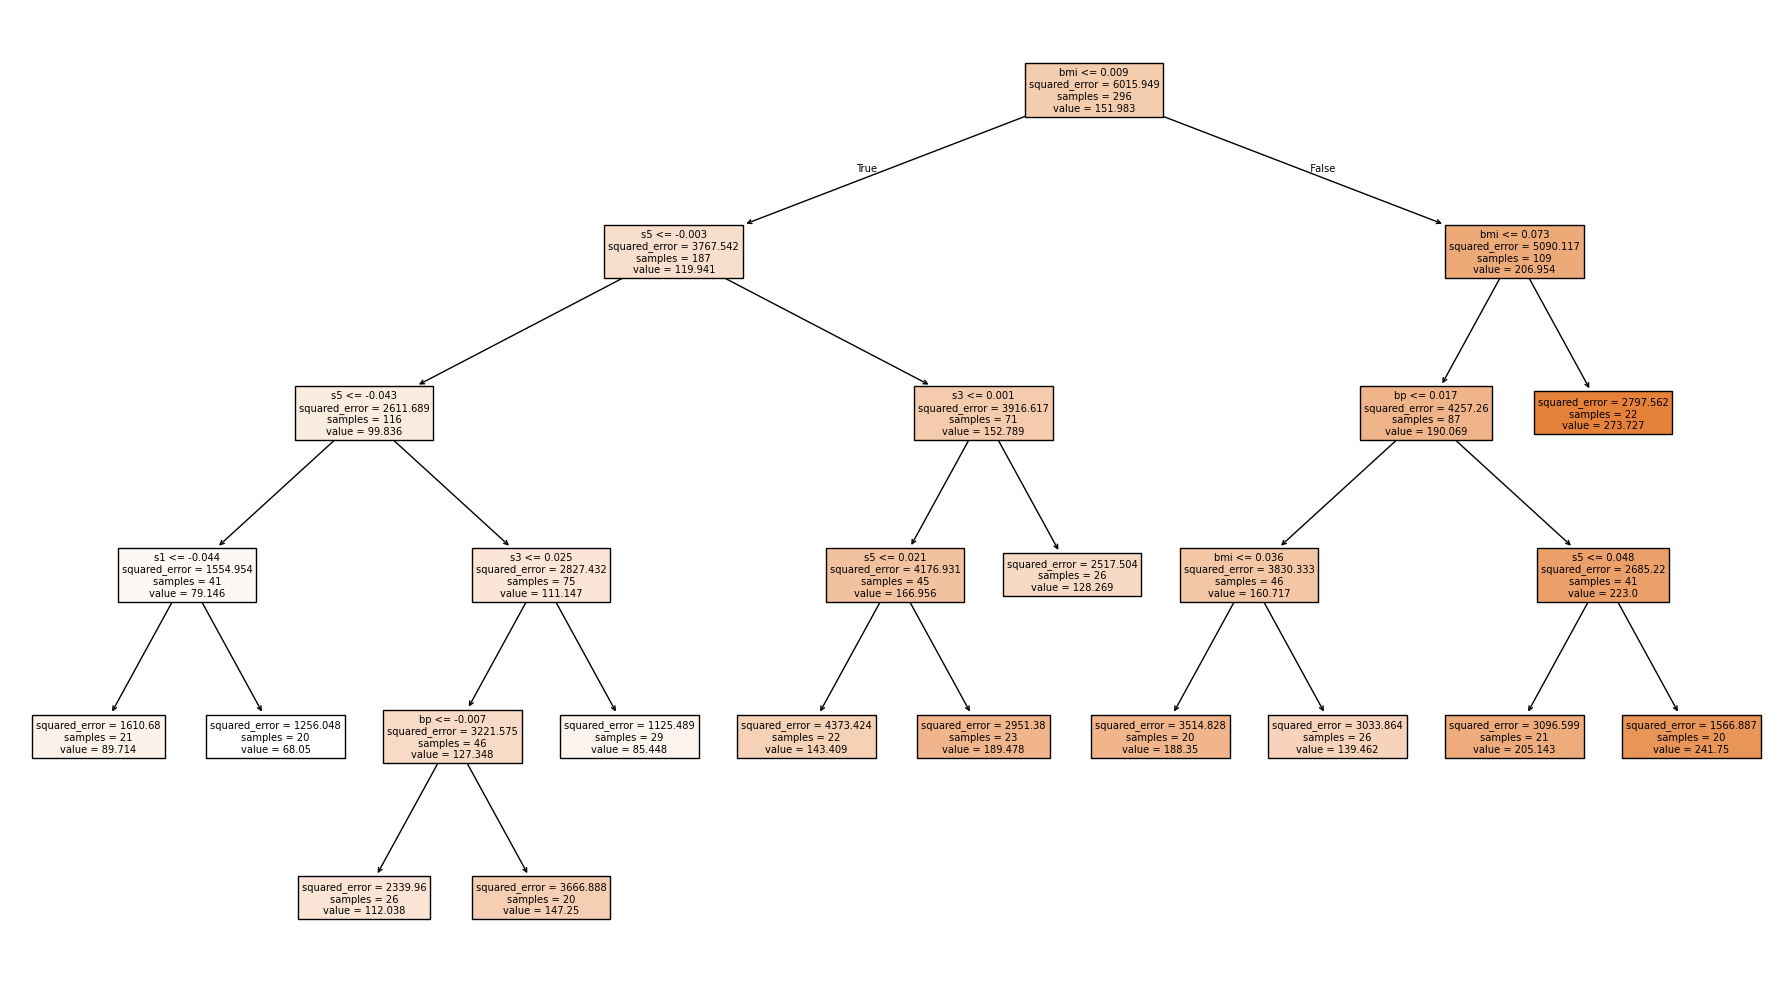

In [34]:
from sklearn.tree import plot_tree
plt.figure(figsize =(18,10))
plot_tree(
    model,
    feature_names=X.columns,
    filled = True,
)
plt.tight_layout()
plt.show()